In [1]:
%load_ext watermark
%watermark

2018-12-21T11:31:12-03:00

CPython 3.6.0
IPython 7.2.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
import pandas as pd

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 inches wide and 10 high for all plots

In this section I will review the dataset. The objective will be to have a dataset as similar to the original but without errors in it that could lead us to draw wrong conclusions.

The input of this step is the output of the previous

In [6]:
vehicles = pd.read_csv("../Data/vehiculos.1.procesado_inicial.csv")

In [7]:
vehicles.shape

(38436, 11)

### Duplicados

In this section I try to see two things:

* Make sure that data that should not be duplicated is not (for example, telephone numbers)

* Check for columns that have a high number of duplicates, as they may not provide much information

The possible entities were::   
    
- manufacturer
- manufacturer-model
- manufacturer-model-year
- manufacturer-year

Of these entities, the only ones that should not repeat specific cars, that is, manufacturer + model + year

In [9]:
vehicles['modelo_unico'] = vehicles.fabricante.str.cat([vehicles.modelo, vehicles.year.apply(str)],sep='-')

In [10]:
vehicles.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985                24
Chevrolet-C10 Pickup 2WD-1984              19
Ford-F150 Pickup 2WD-1984                  19
GMC-C15 Pickup 2WD-1984                    19
GMC-S15 Pickup 2WD-1984                    18
GMC-C15 Pickup 2WD-1985                    18
Chevrolet-C10 Pickup 2WD-1985              18
Chevrolet-S10 Pickup 2WD-1984              18
Dodge-Ram 50 Pickup 2WD-1984               17
GMC-C15 Pickup 2WD-1986                    17
Mitsubishi-Truck 2WD-1984                  17
Chevrolet-C10 Pickup 2WD-1986              17
Ford-Ranger Pickup 2WD-1984                17
Ford-Escort-1984                           16
Mercury-Lynx-1984                          16
Ford-Escort-1985                           16
Chevrolet-G10/20 Van 2WD-1984              16
Volkswagen-Rabbit-1984                     16
GMC-Vandura G15/25 2WD-1984                16
Ford-F150 Pickup 2WD-1985                  16
Ford-E150 Econoline 2WD-1984               15
Volkswagen-Jetta-1984             

I realize that there are many repeated

In [11]:
vehicles[vehicles.modelo_unico=='Chevrolet-C1500 Pickup 2WD-1991'].head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
4957,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4958,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4959,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4960,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4961,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,15,592.466667,Chevrolet-C1500 Pickup 2WD-1991


as can be seen, each unique model has different configurations of each car (3 speeds or 4 for example)

Therefore,I am only going to consider duplicates those records that are identical in all their columns

In [12]:
vehicles[vehicles.duplicated()].shape

(1506, 12)

as can be seen that there are 1506 duplicate records, I can eliminate them for the rest of the analysis because they can distort the conclusions

In [13]:
vehicles = vehicles.drop_duplicates()
vehicles.shape

(36930, 12)

We delete the column `modelo_unico`

In [14]:
del vehicles['modelo_unico']

Now we need to see if there are variables in which there are a large number of records that have the same value (cardinality).

In [15]:
n_records = len(vehicles)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*n_records),3),
            round(menos_comun / (1.0*n_records),3),
            df[columna].dtype
        ))

valores_duplicados_col(vehicles)

fabricante | 0.1-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.353-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


I see that the fields `traccion, transmission, cilindros y combustible` can have a problem of repeated values, in reality 30% is not very dramatic, it would be different if the most common value had 90%.

In [16]:
vehicles.traccion.value_counts(normalize=True)

Front-Wheel Drive             0.360280
Rear-Wheel Drive              0.352863
4-Wheel or All-Wheel Drive    0.177345
All-Wheel Drive               0.062325
4-Wheel Drive                 0.030886
2-Wheel Drive                 0.011402
Part-time 4-Wheel Drive       0.004899
Name: traccion, dtype: float64

as can be seen that this makes sense, since the vast majority of vehicles have two-wheel drive, either front or rear.

In this case, someone with domain knowledge might realize that 2-Wheel Drive is probably just a different classification of Front or Rear.

https://www.edmunds.com/car-technology/what-wheel-drive.html

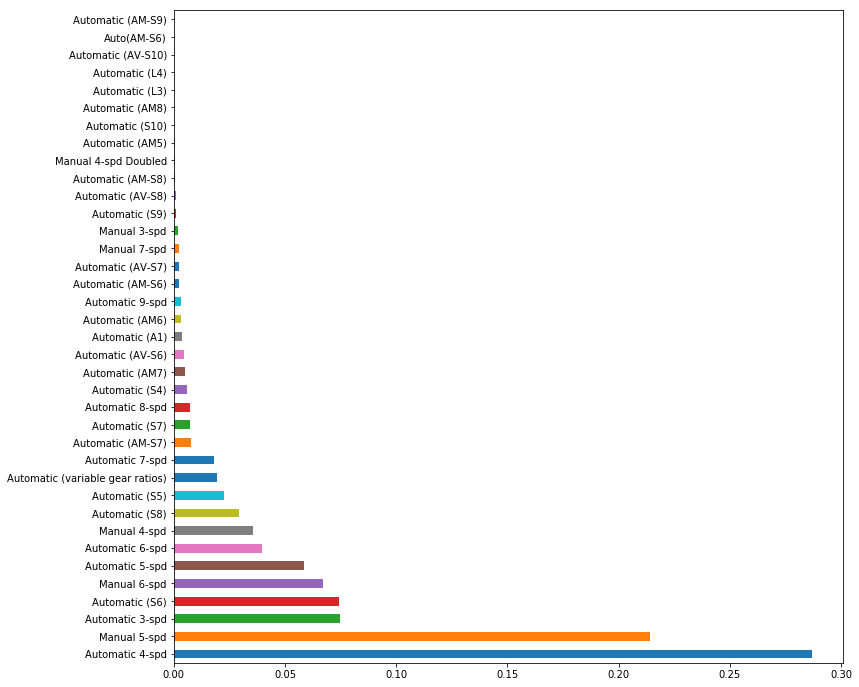

In [19]:
vehicles.transmision.value_counts(normalize=True).plot.barh();

although transmission has a relatively high cardinality, it actually shows a distribution of types, with two major classes

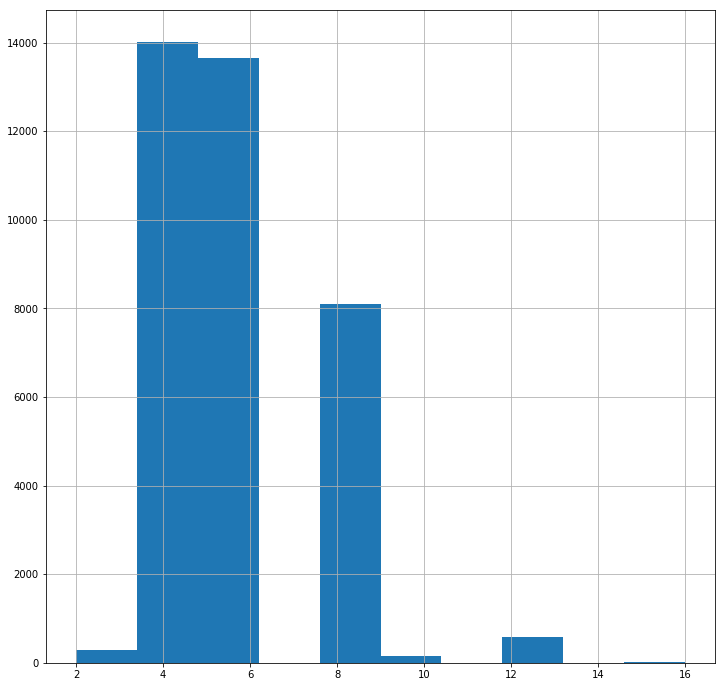

In [20]:
vehicles.cilindros.hist();

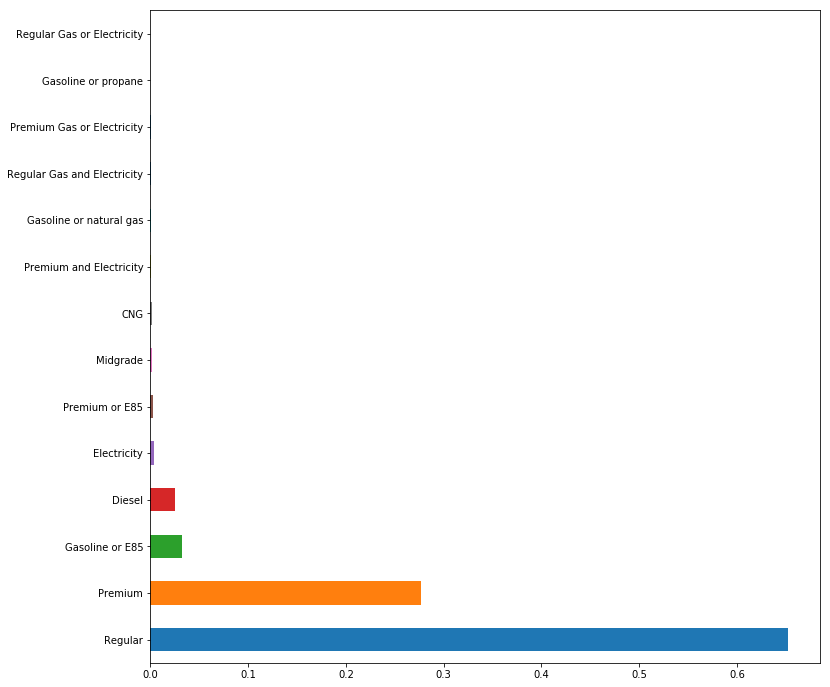

In [21]:
vehicles.combustible.value_counts(normalize=True).plot.barh();

The column `combustible`  can have a problem having 65% of the cases petrol `Regular`

### Non-existent values

In [22]:
n_records = len(vehicles)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehicles)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


as can be seen that field `traction, cylinders and transmission` have nonexistent values. However, they are negligible amounts (maximum is the traction variable with 3% nonexistent)


### outliers

To detect extreme values, a general measure is to consider outliers those values with a Z score (z score) greater than 3, that is, they move 3 times or more standard deviations away from the average.

The z score is defined as:

$$z(x)= \frac{x-\mu}{\sigma}$$

In [23]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(vehicles)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


/home/crespo/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


As can be seen that the variables of consumption and co2 have outliers. We can make a boxplot to visualize this better

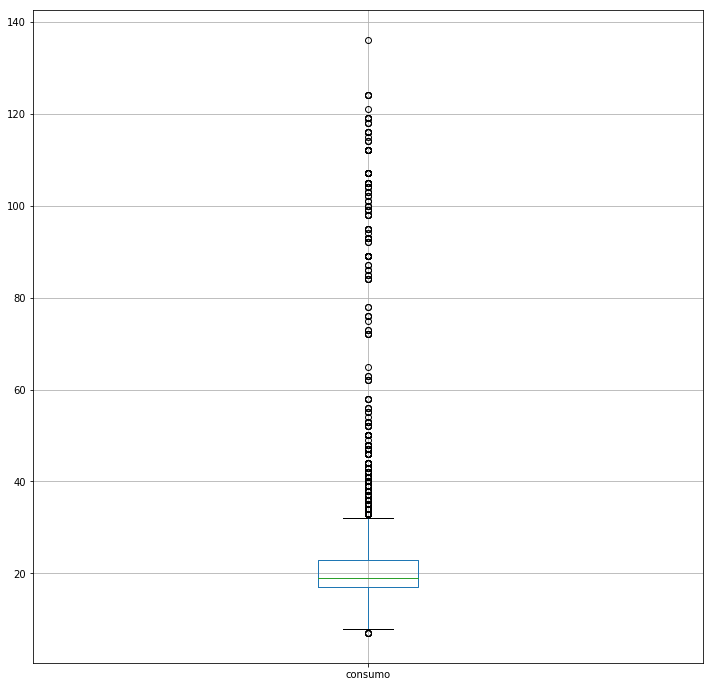

In [24]:
vehicles.boxplot(column='consumo');

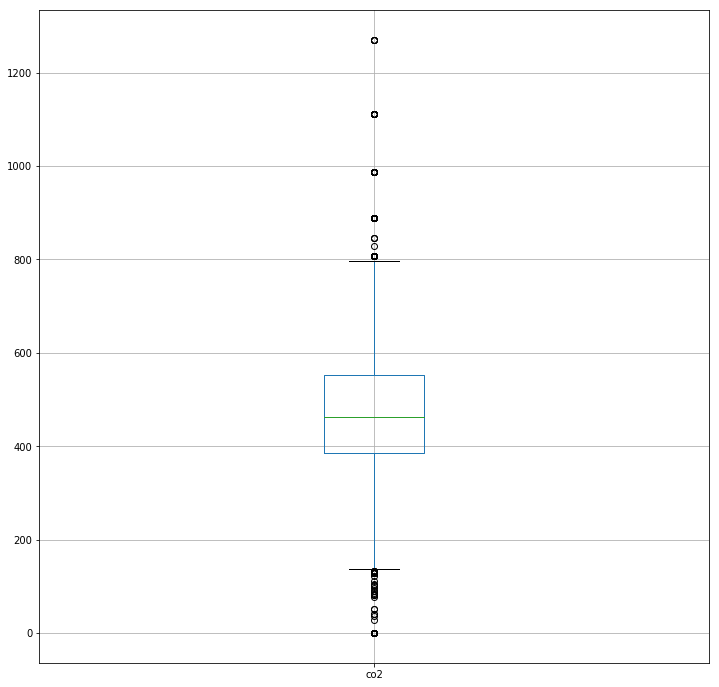

In [25]:
vehicles.boxplot(column='co2');

As can be seen that in terms of consumption there are some cars that pollute more than normal and others that pollute less than normal, we also see that there are cars that do not contaminate anything!

Is it possible that there are cars that do not use gasoline in the dataset



In [26]:
vehicles[vehicles.co2==0].combustible.unique()

array(['Electricity'], dtype=object)

In [27]:
vehicles.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

As can be seen that in this dataset there are hybrid vehicles and pure electric vehicles. Since the objective is pollution, it would be advisable to remove at least those vehicles that do not pollute!

In [28]:
non_electric_vehicles = vehicles[vehicles.co2>0]

Let's review the data again with the new dataset

In [29]:
outliers_col(non_electric_vehicles)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


/home/crespo/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


There are still outliers in terms of consumption and CO2. Is it because hybrid vehicles consume less? If it were for this, these extreme values are perfectly valid values and therefore we should not eliminate them

In [30]:
non_electric_vehicles[
    np.abs(stats.zscore(non_electric_vehicles["consumo"])) > 3
].combustible.value_counts(normalize=True)

Regular                        0.7175
Diesel                         0.1525
Premium                        0.0550
Regular Gas and Electricity    0.0475
Premium Gas or Electricity     0.0200
Regular Gas or Electricity     0.0050
Premium and Electricity        0.0025
Name: combustible, dtype: float64


It is not the case, that there are outliers in a range of both hybrid and non-hybrid fuels. So they are real outliers.

In [31]:
valores_duplicados_col(non_electric_vehicles)

fabricante | 0.099-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.351-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


### Non-existent values

In [32]:
valores_inexistentes_col(vehicles)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


there are no extreme nonexistent values in any variable. The variable with the highest number of nonexistent values is traction (2%). Obviously, electric cars do not have a gasoline engine and therefore, have no cylinders

### Conclusion
- There are 1506 duplicate records (we have removed them)
- the variables `displacement, cylinders, transmission and traction have non-existent values`
- The variable `fuel` has a dominant class (65% of cars have` Regular` fuel)
- there is an outlier in the variables `co2` and` consumption`
- There are hybrid cars and electric cars (we have removed the latter as they do not pollute).

In [33]:
non_electric_vehicles.to_csv("../Data/vehiculos.2.limpio_analisis.csv", index=False)